# Task:1

### 1. Create a dataset of 1000 points in 4-dimensionalspace. The points should be randomly generated andshould be distributed around the origin (0,0,0,0).

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
np.random.seed(42)
data = np.random.randn(1000, 4)

### 2. Perform PCA on the dataset to reduce thedimensionality to 2

In [30]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

### 3. Plot the original data points and the transformeddata points in a 2D scatter plot.

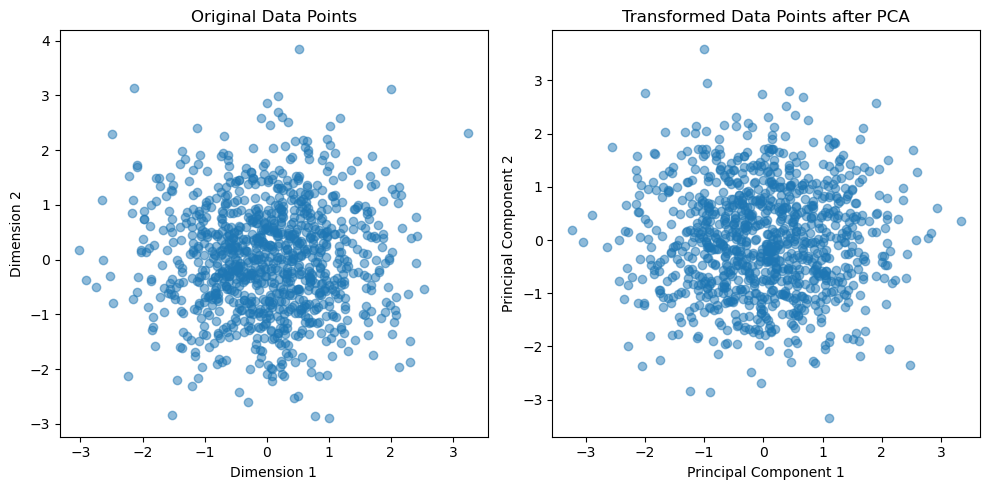

In [37]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Original Data Points')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.title('Transformed Data Points after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


# Task:2
    

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### 1. Use the MNIST dataset, which contains 60,000 images of handwritten digits (0-9) and their corresponding labels.

In [14]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [23]:
X = mnist.data
y = mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)


### 2. Perform PCA on the dataset to reduce thedimensionality to 20.

In [17]:

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 3. Use the transformed data as input to a simplesupervised learning model such as k-Nearest Neighbors (k-NN) or Logistic Regression.

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [20]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [21]:
y_pred_knn_pca = knn_pca.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

###  4. Evaluate the performance of the model on a test setof 10,000 images and compare it to the performanceof the model when using the original data (784 dimensions).

In [22]:
print("Accuracy of k-Nearest Neighbors on original data:", accuracy_knn)
print("Accuracy of k-Nearest Neighbors on reduced data (PCA):", accuracy_knn_pca)

Accuracy of k-Nearest Neighbors on original data: 0.9696
Accuracy of k-Nearest Neighbors on reduced data (PCA): 0.9682
